In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df_slow1 = pd.read_pickle("2020-12-13-16:02:05")
df_fast1 = pd.read_pickle("2020-12-13-16:02:51")

df_slow2 = pd.read_pickle("2020-12-13-17:37:21")
df_fast2 = pd.read_pickle("2020-12-13-18:35:53")

In [109]:
t_slow1 = df_slow1['TIME'] - df_slow1['TIME'][0]
t_fast1 = df_fast1['TIME'] - df_fast1['TIME'][0]
t_slow2 = df_slow2['TIME'] - df_slow2['TIME'][0]
t_fast2 = df_fast2['TIME'] - df_fast2['TIME'][0]


v_fast1 = []
v_fast2 = []
for i in range(1,len(t_fast1)):
    vx = (df_fast1['X'][i] - df_fast1['X'][i-1]) / (df_fast1['TIME'][i] - df_fast1['TIME'][i-1])
    vy = (df_fast1['Y'][i] - df_fast1['Y'][i-1]) / (df_fast1['TIME'][i] - df_fast1['TIME'][i-1])
    vz = (df_fast1['Z'][i] - df_fast1['Z'][i-1]) / (df_fast1['TIME'][i] - df_fast1['TIME'][i-1])

    v_fast1.append(np.sqrt(vx**2 + vy**2 + vz**2))

for i in range(1,len(t_fast2)):
    vx = (df_fast2['X'][i] - df_fast2['X'][i-1]) / (df_fast2['TIME'][i] - df_fast2['TIME'][i-1])
    vy = (df_fast2['Y'][i] - df_fast2['Y'][i-1]) / (df_fast2['TIME'][i] - df_fast2['TIME'][i-1])
    vz = (df_fast2['Z'][i] - df_fast2['Z'][i-1]) / (df_fast2['TIME'][i] - df_fast2['TIME'][i-1])

    v_fast2.append(np.sqrt(vx**2 + vy**2 + vz**2))

v_fast1 = np.asarray(v_fast1)
v_fast2 = np.asarray(v_fast2)

In [110]:
def getidx(df):
    i1 = np.where(df['X'] - df['X'][0] == 0)[0]
    i2 = np.where(df['X'] - df['X'][len(df['X']) - 1] == 0)[0]
    i1 = int(i1[len(i1)-1])
    i2 = int(i2[0])
    return range(i1,(i2+1))
idx1 = getidx(df_slow1)
idx2 = getidx(df_fast1)
idx3 = getidx(df_slow2)
idx4 = getidx(df_fast2)

Text(0.5, 1.0, 'Fast Arm Speed without Smoothing')

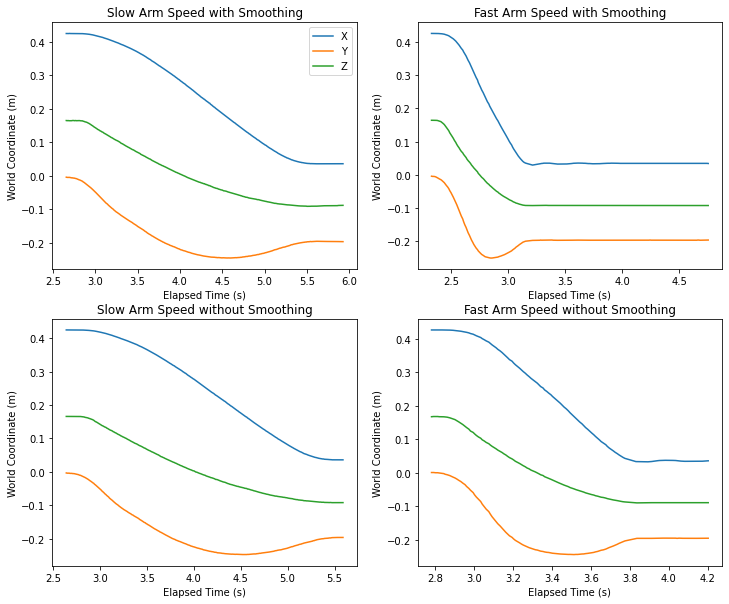

In [111]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(t_slow1[idx1], df_slow1['X'][idx1], label="X")
plt.plot(t_slow1[idx1], df_slow1['Y'][idx1], label="Y")
plt.plot(t_slow1[idx1], df_slow1['Z'][idx1], label="Z")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("World Coordinate (m)")
plt.title("Slow Arm Speed with Smoothing")
plt.legend()

plt.subplot(222)
plt.plot(t_fast1[idx2], df_fast1['X'][idx2], label="X")
plt.plot(t_fast1[idx2], df_fast1['Y'][idx2], label="Y")
plt.plot(t_fast1[idx2], df_fast1['Z'][idx2], label="Z")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("World Coordinate (m)")
plt.title("Fast Arm Speed with Smoothing")

plt.subplot(223)
plt.plot(t_slow2[idx3], df_slow2['X'][idx3], label="X")
plt.plot(t_slow2[idx3], df_slow2['Y'][idx3], label="Y")
plt.plot(t_slow2[idx3], df_slow2['Z'][idx3], label="Z")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("World Coordinate (m)")
plt.title("Slow Arm Speed without Smoothing")

plt.subplot(224)
plt.plot(t_fast2[idx4], df_fast2['X'][idx4], label="X")
plt.plot(t_fast2[idx4], df_fast2['Y'][idx4], label="Y")
plt.plot(t_fast2[idx4], df_fast2['Z'][idx4], label="Z")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("World Coordinate (m)")
plt.title("Fast Arm Speed without Smoothing")


(0.0, 1.5)

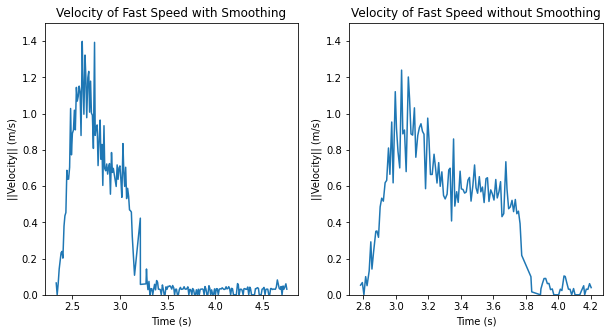

In [122]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(t_fast1[idx2], v_fast1[idx2], label="Velocity with Smoothing")
plt.xlabel("Time (s)")
plt.ylabel("||Velocity|| (m/s)")
plt.title("Velocity of Fast Speed with Smoothing")
plt.ylim(0,1.5)
plt.subplot(122)

plt.plot(t_fast2[idx4], v_fast2[idx4], label="Velocity without Smoothing")
plt.xlabel("Time (s)")
plt.ylabel("||Velocity|| (m/s)")
plt.title("Velocity of Fast Speed without Smoothing")
plt.ylim(0,1.5)